# Scenario 1

**Goh Jin Quan Marcus**

## 1: Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay


ModuleNotFoundError: No module named 'pandas'

## 2: Load Data

In [ ]:
# Load Data
df = pd.read_csv("scenario_1.csv")

## 3: Summary Statistics

In [ ]:
# Check the top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Dataset summary statistics
df.describe()



,PassengerId,Survived,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
# Check the Column names, number of Non-Null Count and Dtype
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   object 
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB
None


## 4: Data Cleaning

### 4.1: Observe NaN Features

In [ ]:
# Check if there is any null values
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 4.2: Filling in Missing Column Data

### 4.3: Dropping Feature Columns

In [ ]:
# Drop feature columns if required
df = df.drop(['Cabin'], axis = 1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [ ]:
df = df.drop(['Age'], axis = 1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [ ]:
df = df.drop(['Name'], axis = 1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [ ]:
df = df.drop(['Ticket'], axis = 1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       2
dtype: int64

### 4.4: Imputation of Missing Data

In [ ]:
# Impute missing data if required
df = df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     1306 non-null   int64  
 2   Pclass       1306 non-null   object 
 3   Sex          1306 non-null   object 
 4   SibSp        1306 non-null   int64  
 5   Parch        1306 non-null   int64  
 6   Fare         1306 non-null   float64
 7   Embarked     1306 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 91.8+ KB


## 5: Dealing with Categorical Data

In [ ]:
# Create dummy variables if required
df_objs = pd.get_dummies(df.select_dtypes(include='object'), drop_first=True)
df = pd.concat([df, df_objs], axis = 1)
df                            


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Q,Embarked_S
0,1,0,3rd,male,1,0,7.2500,S,False,True,True,False,True
1,2,1,1st,female,1,0,71.2833,C,False,False,False,False,False
2,3,1,3rd,female,0,0,7.9250,S,False,True,False,False,True
3,4,1,1st,female,1,0,53.1000,S,False,False,False,False,True
4,5,0,3rd,male,0,0,8.0500,S,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3rd,male,0,0,8.0500,S,False,True,True,False,True
1305,1306,1,1st,female,0,0,108.9000,C,False,False,False,False,False
1306,1307,0,3rd,male,0,0,7.2500,S,False,True,True,False,True
1307,1308,0,3rd,male,0,0,8.0500,S,False,True,True,False,True


In [ ]:
df = df.drop(list(df.select_dtypes(include='object')), axis = 1)
df

,PassengerId,Survived,SibSp,Parch,Fare,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Q,Embarked_S
0,1,0,1,0,7.2500,False,True,True,False,True
1,2,1,1,0,71.2833,False,False,False,False,False
2,3,1,0,0,7.9250,False,True,False,False,True
3,4,1,1,0,53.1000,False,False,False,False,True
4,5,0,0,0,8.0500,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,0,0,8.0500,False,True,True,False,True
1305,1306,1,0,0,108.9000,False,False,False,False,False
1306,1307,0,0,0,7.2500,False,True,True,False,True
1307,1308,0,0,0,8.0500,False,True,True,False,True


## 6: Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

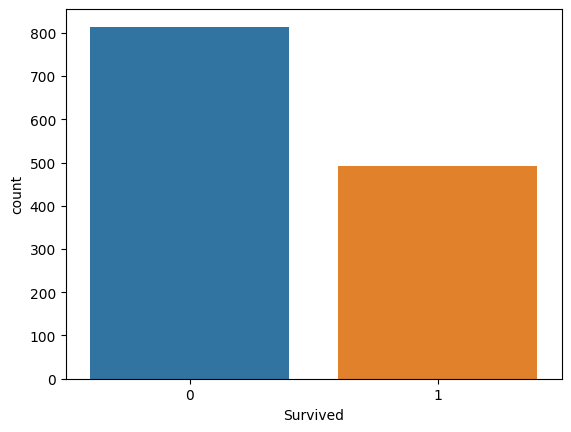

In [ ]:
# Check distribution of target (barchart)
sns.countplot(x = 'Survived', data=df)

<Axes: >

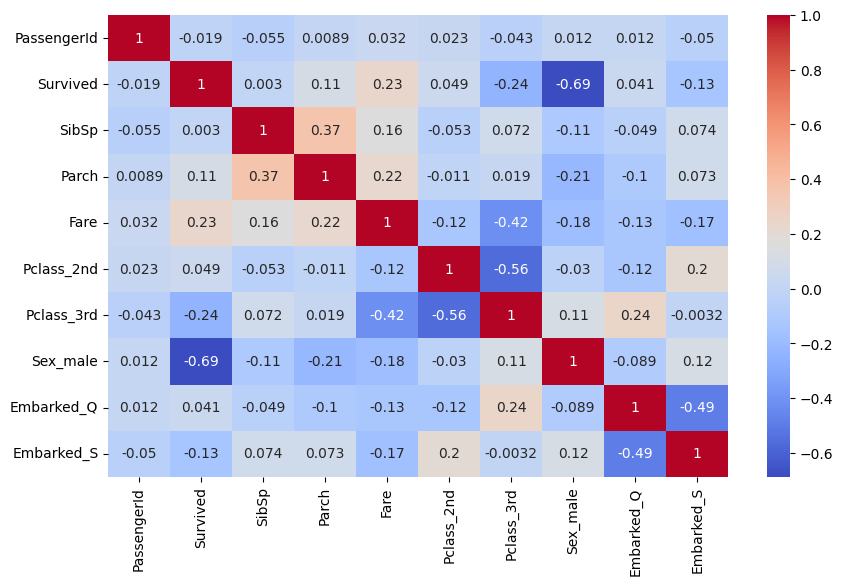

In [ ]:
# Check correlation of features to target (heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

In [ ]:
df = df[['Survived', 'Parch', 'Fare', 'Pclass_3rd', 'Sex_male', 'Embarked_S']]

c:\Users\gohji\OneDrive\Documents\ALML project\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


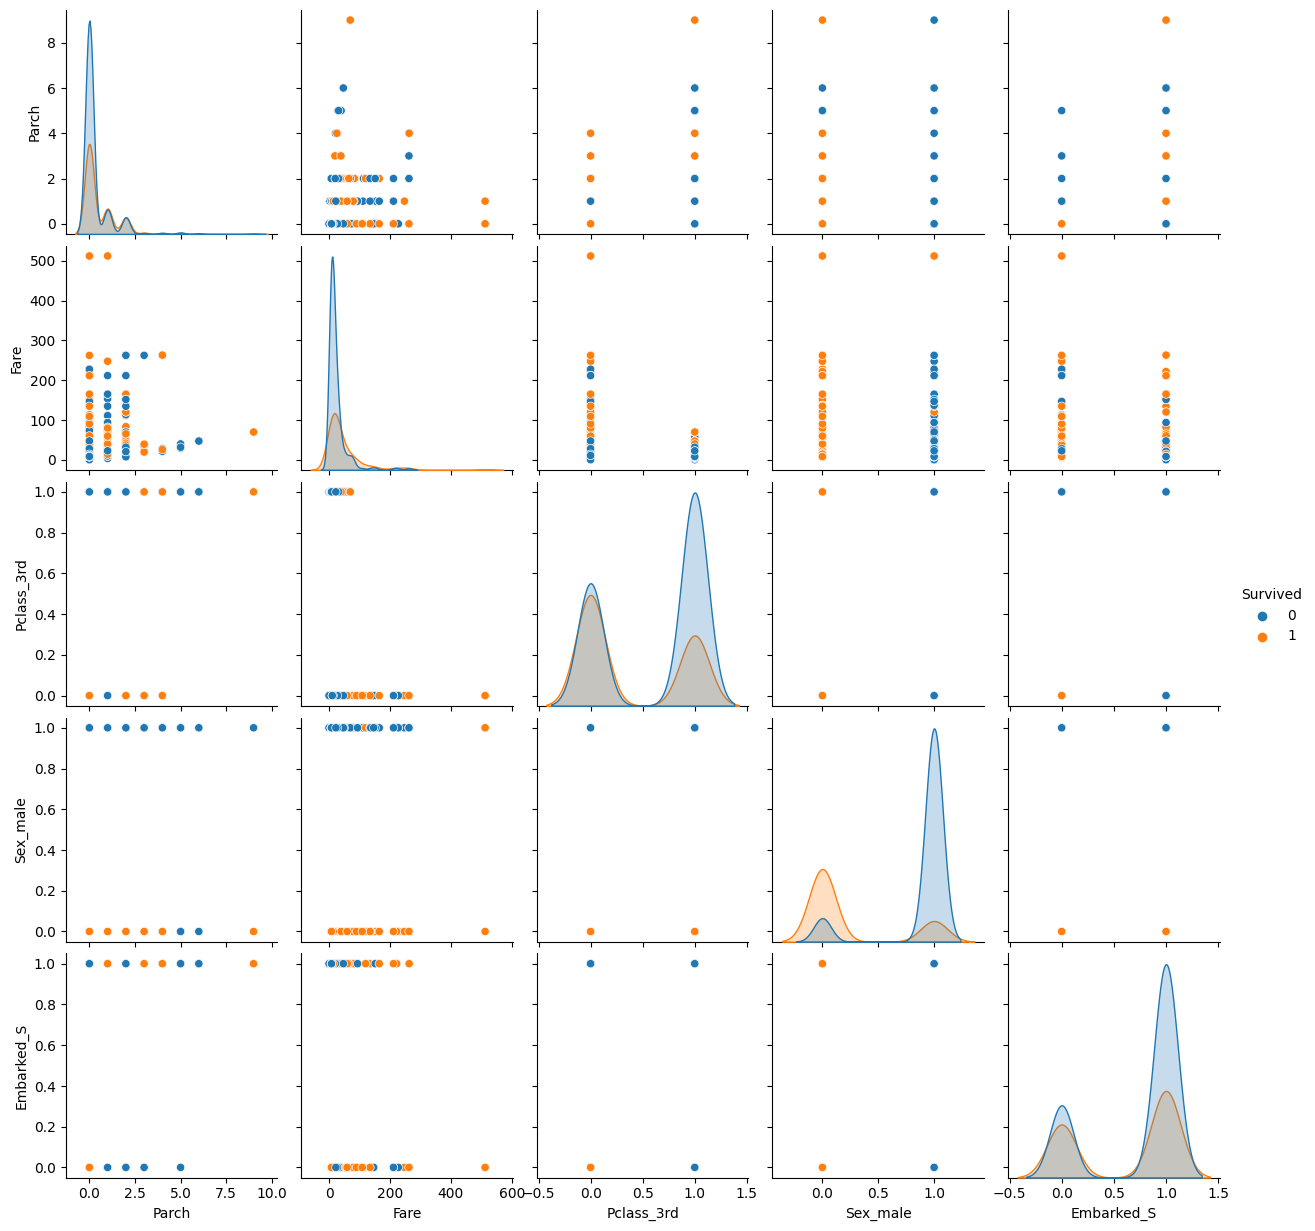

In [ ]:
# Check relationship for relevant features to target (pairplot)


sns.pairplot(df,diag_kind = 'kde', hue = 'Survived')


## 7: Split Dataset

In [ ]:
# Train test split to get the test dataset
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)


In [ ]:
# Train test split to get the train and validate dataset
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)


## 8: Normalise Dataset

In [ ]:
# Normalise train dataset
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)


In [ ]:
# Normalise validate dataset
scaled_X_test = scaler.transform(X_test)

In [ ]:
# Normalise test dataset
scaled_X_eval = scaler.fit_transform(X_eval)



## 9: $M_0$ Model(Random Forest Classification) (Baseline)

In [ ]:
# Create model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train model

model = RandomForestClassifier()


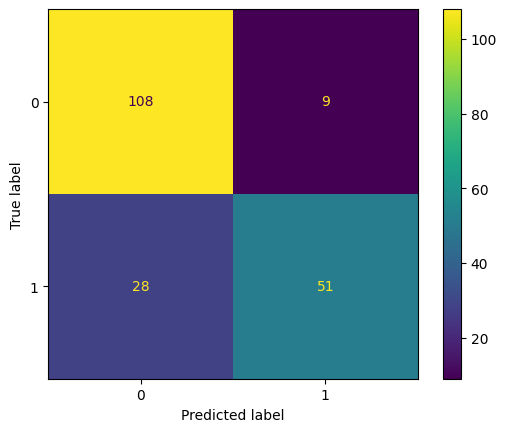

In [ ]:
# Validate model

model.fit(scaled_X_train,y_train)
base_pred = model.predict(scaled_X_eval)
cm_display = ConfusionMatrixDisplay.from_estimator(model, scaled_X_eval, y_eval)



In [ ]:
# Evaluate model

from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print(classification_report(y_eval,base_pred))



              precision    recall  f1-score   support

           0       0.79      0.92      0.85       117
           1       0.85      0.65      0.73        79

    accuracy                           0.81       196
   macro avg       0.82      0.78      0.79       196
weighted avg       0.82      0.81      0.81       196



## 10: $M_1$(LogisticRegression) Model

In [ ]:

# Create model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()



In [ ]:
# Train model
log_model.fit(scaled_X_train,y_train)
y_pred = log_model.predict(scaled_X_eval)
log_model.coef_

confusion_matrix(y_eval,y_pred)


array([[105,  12],
       [ 21,  58]], dtype=int64)

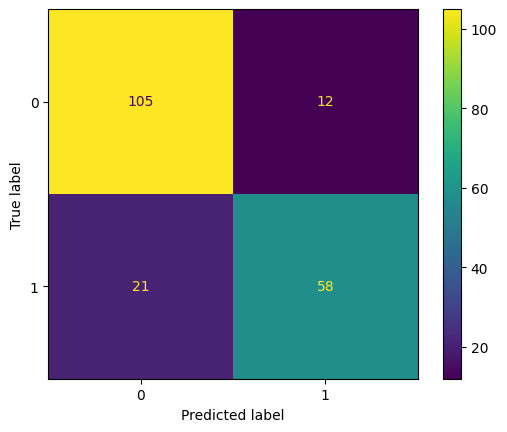

In [ ]:
# Validate model
cm_display = ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_eval, y_eval)


In [ ]:
# Evaluate model
print(classification_report(y_eval,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       117
           1       0.83      0.73      0.78        79

    accuracy                           0.83       196
   macro avg       0.83      0.82      0.82       196
weighted avg       0.83      0.83      0.83       196



## 11: Analysis

In [ ]:
#classification Reports
y_pred = log_model.predict(scaled_X_test)
target_names = df['Survived'].unique()
class_report = classification_report(y_test, y_pred, target_names = ['Class 0', 'Class 1'])
print("classification_report:")
print(class_report)

classification_report:
              precision    recall  f1-score   support

     Class 0       0.86      0.94      0.90       122
     Class 1       0.89      0.76      0.82        74

    accuracy                           0.87       196
   macro avg       0.88      0.85      0.86       196
weighted avg       0.87      0.87      0.87       196



* Which is the better model?
* Why is it the better model?
* Why is the selected metric suitable for evaluating your model?
* Any other thoughts / comments / future enhancements

* Which is the better model?

Based on the classification reports above, the LogisticRegression model appears to be the better model. It has higher precision, recall and F1-scores for both Class 0 and Class 1. It also has a higher accuracy compared to the Random Forest Classification model.

* Why is it the better model?

The LogisticRegression model's better performance can be credited to its capability to achieve higher precision and recall simultaneously. The precision and recall trade-off is a common consideration in classification tasks. A model with a greater balance between precision and recall is often preferred. It also indicates that the model is effectively identifying both positive and negative cases.

* Why is the selected metric suitable for evaluating your model?

The selected metric for evaluation is the classification report. Classification report provides wider view of a model's performance across multiple metrics including precision, recall, and F1-score for each class. This is suitable for evaluating classification models because it gives insights into how well the model is performing for both the positive and negative classes.

* Any other thoughts / comments / future enhancements

It's good to consider the type of business context when selecting a model. Depending on the problem, precision or recall might be more crucial. For example, in a medical diagnosis scenario, recall might be more critical to minimise false negatives.

I can consider cross-validation to get a more robust estimate of the model's performance. It helps ensure that the evaluation is not heavily influenced by the specific train-test split.

I could try hyperparameter tuning for both models to see if their performance can be further improved.

